In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Documents\Inc_Exp_Data.csv")

In [3]:
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


 <!-- analyze the data -->

# analyze the data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [5]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


##### transpose of it

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mthly_HH_Income,50.0,41558.00,26097.908979,5000.0,23550.0,35000.0,50375.0,100000.0
Mthly_HH_Expense,50.0,18818.00,12090.216824,2000.0,10000.0,15500.0,25000.0,50000.0
No_of_Fly_Members,50.0,4.06,1.517382,1.0,3.0,4.0,5.0,7.0
Emi_or_Rent_Amt,50.0,3060.00,6241.434948,0.0,0.0,0.0,3500.0,35000.0
Annual_HH_Income,50.0,490019.04,320135.792123,64200.0,258750.0,447420.0,594720.0,1404000.0
No_of_Earning_Members,50.0,1.46,0.734291,1.0,1.0,1.0,2.0,4.0


In [7]:
df.isnull().sum()


Mthly_HH_Income             0
Mthly_HH_Expense            0
No_of_Fly_Members           0
Emi_or_Rent_Amt             0
Annual_HH_Income            0
Highest_Qualified_Member    0
No_of_Earning_Members       0
dtype: int64

# mean

In [8]:
df['Mthly_HH_Expense'].mean()

18818.0

# median

In [9]:
df['Mthly_HH_Expense'].median()

15500.0

# what is the monthly expense of most of the household

In [10]:
pd.crosstab(df['Mthly_HH_Expense'],columns="Count")

col_0,Count
Mthly_HH_Expense,
2000,1
4500,1
5000,1
6600,1
7000,1
8000,3
9000,3
10000,5
10500,1


In [11]:
mth_exp=pd.crosstab(df['Mthly_HH_Expense'],columns="count")
mth_exp.reset_index(inplace=True)
mth_exp

col_0,Mthly_HH_Expense,count
0,2000,1
1,4500,1
2,5000,1
3,6600,1
4,7000,1
5,8000,3
6,9000,3
7,10000,5
8,10500,1
9,12000,3


In [28]:
mth_exp[mth_exp['count'].values == df['Mthly_HH_Expense'].value_counts().max()]

col_0,Mthly_HH_Expense,count
18,25000,8


# plot the graph for highest qualified number

In [30]:
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


(array([10.,  0.,  5.,  0.,  0., 19.,  0.,  6.,  0., 10.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

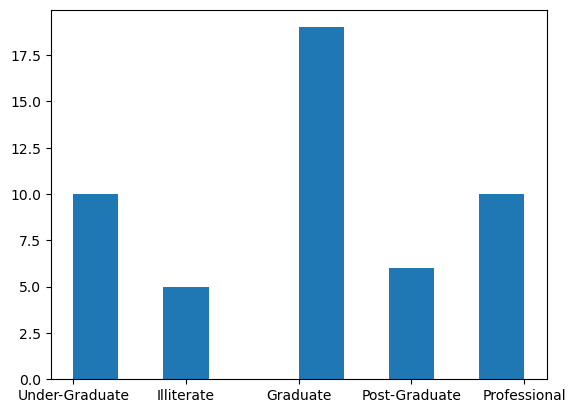

In [35]:
plt.hist(df['Highest_Qualified_Member'])

# cal IQR blw 75 and 25 quatile

<Axes: xlabel='Mthly_HH_Income'>

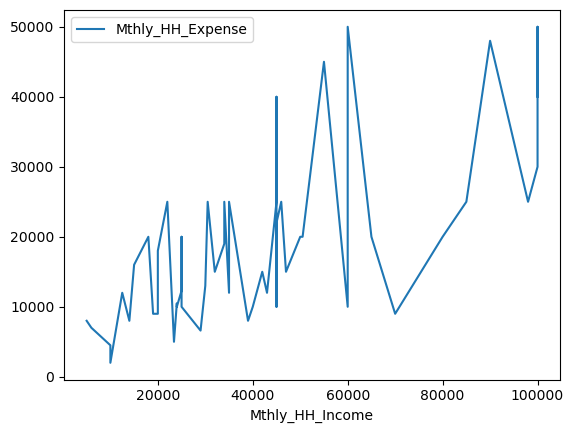

In [36]:
df.plot(x="Mthly_HH_Income",y="Mthly_HH_Expense")

In [42]:
IQR=df['Mthly_HH_Expense'].quantile(0.75)-(df['Mthly_HH_Expense'].quantile(0.25))
IQR

15000.0

# Calculate std for first 4 columns

In [48]:
pd.DataFrame(df.iloc[:,0:5].std().to_frame()).T

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income
0,26097.908979,12090.216824,1.517382,6241.434948,320135.792123


# calculate the count of Highest qualified number

In [52]:
df['Highest_Qualified_Member'].value_counts().to_frame()

,count
Highest_Qualified_Member,
Graduate,19
Under-Graduate,10
Professional,10
Post-Graduate,6
Illiterate,5


  # The coefficient of variation (CV) is the ratio of the standard deviation to the mean

In [54]:
print (10/15)

0.6666666666666666


In [55]:
print(10/5)

2.0
